In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the delivery dataset 
delivery = pd.read_csv(r'dataset.csv')
delivery.head()

,order_id,customer_number,transaction_date,description,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,customer_group,territory,delivery_date,delivery_window_end_time,delivery_window_start_time,set_warehouse,duka_latitude,duka_longitude
0,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Steam Energy Energy Drink 400ML CARTON (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
1,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Sumo Candles 8PC CARTON (12.0 Outers),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
2,04aeddd4-d9b3-4cca-ab3b-072ca177a3e1,ID_172101,28/03/2022,Rhino Matches Kubwa 10 Boxes OUTER (1.0 Item),6,2231.57,0,0,66.38,Individual,Meru,29/03/2022,19:00:00,13:00:00,Meru Main - KDKE,0.036784,37.654155
3,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Dawn Tissue Rolls Smart 40PC BALE (1.0 Bale),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155
4,4da580db-3b2c-4dff-a181-9c1341e05ea5,ID_172101,12/03/2022,Sawa Bath Soap 125G White DOZEN (1.0 Dzn),5,3637.91,0,0,38.53,Individual,Meru,14/03/2022,14:00:00,08:00:00,Meru Main - KDKE,0.036784,37.654155


In [3]:
delivery.shape

(43718, 17)

The dataset contains 43718 rows and 17 columns

In [4]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43718 entries, 0 to 43717
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   order_id                    43718 non-null  object 
 1   customer_number             43718 non-null  object 
 2   transaction_date            43718 non-null  object 
 3   description                 43718 non-null  object 
 4   total_qty                   43718 non-null  int64  
 5   net_total                   43718 non-null  float64
 6   loyalty_amount              43718 non-null  int64  
 7   loyalty_points              43718 non-null  int64  
 8   discount_amount             43718 non-null  float64
 9   customer_group              43718 non-null  object 
 10  territory                   43718 non-null  object 
 11  delivery_date               43718 non-null  object 
 12  delivery_window_end_time    43718 non-null  object 
 13  delivery_window_start_time  437

In [5]:
delivery.isnull().sum()

order_id                      0
customer_number               0
transaction_date              0
description                   0
total_qty                     0
net_total                     0
loyalty_amount                0
loyalty_points                0
discount_amount               0
customer_group                0
territory                     0
delivery_date                 0
delivery_window_end_time      0
delivery_window_start_time    0
set_warehouse                 0
duka_latitude                 0
duka_longitude                0
dtype: int64

There are no null values in the dataset.

In [6]:
delivery.describe()

,total_qty,net_total,loyalty_amount,loyalty_points,discount_amount,duka_latitude,duka_longitude
count,43718.000000,4.371800e+04,43718.0,43718.0,43718.000000,43718.000000,43718.000000
mean,6.603367,1.046441e+04,0.0,0.0,178.727343,-1.218860,36.898733
std,13.364121,3.023364e+04,0.0,0.0,496.646786,1.066350,1.130535
min,1.000000,1.810300e+02,0.0,0.0,0.000000,-4.289833,34.455751
25%,2.000000,2.556318e+03,0.0,0.0,35.600000,-1.314316,36.715435
50%,4.000000,4.864660e+03,0.0,0.0,72.700000,-1.218128,36.905558
75%,7.000000,9.484540e+03,0.0,0.0,155.250000,-0.628575,37.023091
max,500.000000,1.379599e+06,0.0,0.0,20231.250000,0.885170,40.121896


 * The average total quantity is 6.6
 * The average net total results to about 10,464

In [7]:
# what are the unique territories
delivery['set_warehouse'].unique()

array(['Meru Main - KDKE', 'Athi River Main - KDKE', 'Nakuru Main - KDKE',
       'Thika Rd Main - KDKE', 'Mtwapa Mombasa Main - KDKE',
       'Eastlands Main - KDKE', 'Kawangware Main - KDKE',
       'Majengo Mombasa Main - KDKE', 'Ruiru Main - KDKE',
       'Ruai Main - KDKE', 'Voi Main - KDKE', 'Kiambu Main - KDKE',
       'Eldoret Main - KDKE', 'Embu Main - KDKE', 'Juja Main - KDKE',
       'Ongata Rongai Main - KDKE', 'Kisumu 1 Main - KDKE',
       'Kisii Main - KDKE', 'Karatina Main - KDKE'], dtype=object)

In [8]:
# read the centroids dataset 
centroids = pd.read_csv(r'territories_centroids.csv')
centroids.head()

,id,territory,warehouse_latitude,warehouse_longitude
0,1,Athi River,-1.427556,36.970444
1,2,Eastlands,-1.324139,36.867000
2,3,Eldoret,0.520185,35.256327
3,4,Embu,-0.542030,37.454250
4,5,Juja,-1.108111,37.013861


In [9]:
centroids.shape

(19, 4)

The centroids dataset cointains 19 rows and 4 columns

In [10]:
centroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   19 non-null     int64  
 1   territory            19 non-null     object 
 2   warehouse_latitude   19 non-null     float64
 3   warehouse_longitude  19 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 740.0+ bytes


In [11]:
centroids.isnull().sum()

id                     0
territory              0
warehouse_latitude     0
warehouse_longitude    0
dtype: int64

There are no null values on the cenrtoids dataset 

In [12]:
centroids['territory'].unique()

array(['Athi River', 'Eastlands', 'Eldoret', 'Embu', 'Juja', 'Karatina',
       'Kawangware', 'Kiambu', 'Kisii', 'Kisumu1', 'Majengo Mombasa',
       'Meru', 'Mtwapa Mombasa', 'Nakuru', 'Ongata Rongai', 'Ruai',
       'Ruiru', 'Thika Rd', 'Voi'], dtype=object)

In [13]:
from sklearn.cluster import KMeans

In [14]:
# coming up with the columns used for clustering 
duka = delivery[['customer_number', 'duka_latitude', 'duka_longitude']].drop_duplicates().reset_index(drop=True)

In [15]:
# warehouse longitudes and latitudes 
warehouse = centroids[['territory', 'warehouse_latitude', 'warehouse_longitude']]

In [16]:
duka_coords = duka[['duka_latitude', 'duka_longitude']].values

#implementing the KMeans clustering model 
num_clusters = warehouse.shape[0] 
kmeans = KMeans(n_clusters=num_clusters, init = 'k-means++', random_state=42) 
duka['cluster'] = kmeans.fit_predict(duka_coords)

In [17]:
warehouse_coords = warehouse[['warehouse_latitude','warehouse_longitude']].values 
warehouse['cluster'] = range(num_clusters) 

In [18]:
#joining the two clusters 
duka = duka.merge(warehouse, left_on='cluster', right_on='cluster', how = 'left', suffixes=('_duka', '_warehouse'))

In [19]:
duka.head()

,customer_number,duka_latitude,duka_longitude,cluster,territory,warehouse_latitude,warehouse_longitude
0,ID_172101,0.036784,37.654155,8,Kisii,-0.671333,34.767889
1,ID_007289,-1.518684,37.267866,16,Ruiru,-1.228694,36.989111
2,ID_063088,-0.271481,36.101636,5,Karatina,-0.473139,37.126222
3,ID_196874,-1.241158,36.896701,0,Athi River,-1.427556,36.970444
4,ID_140563,-4.007936,39.690049,1,Eastlands,-1.324139,36.867000


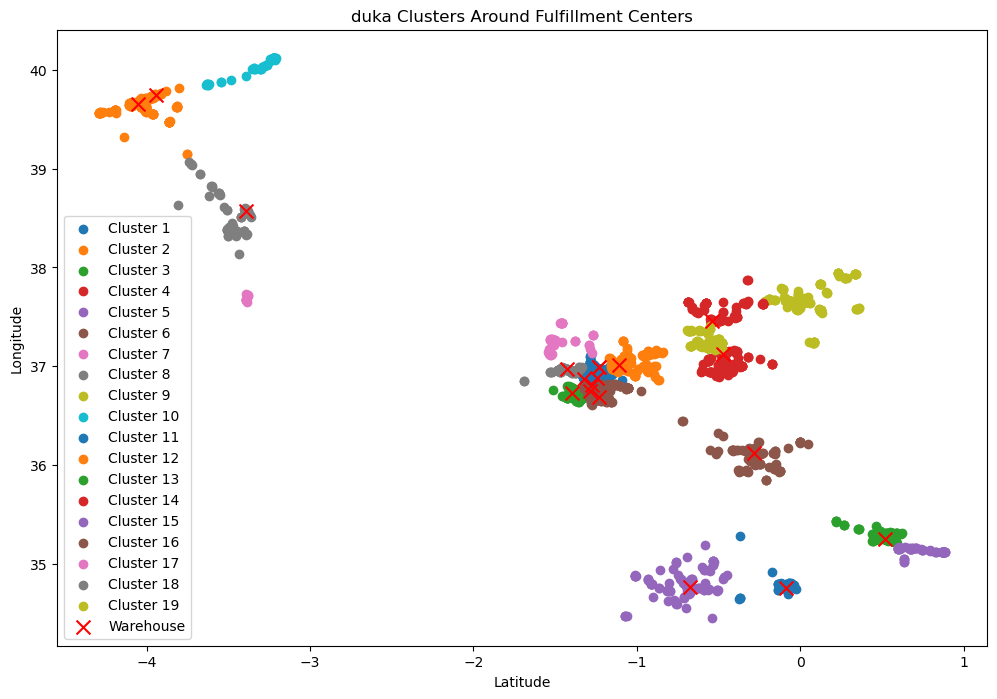

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot the clusters on a map
plt.figure(figsize=(12, 8))
for cluster_id in range(num_clusters):
    duka_cluster = duka[duka['cluster'] == cluster_id]
    plt.scatter(duka_cluster['duka_latitude'], duka_cluster['duka_longitude'], label=f'Cluster {cluster_id + 1}')

# Plot warehouse locations
plt.scatter(warehouse['warehouse_latitude'], warehouse['warehouse_longitude'], color='red', marker='x', s=100, label='Warehouse')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('duka Clusters Around Fulfillment Centers')
plt.show()

In [21]:
# saving the duka df into a csv file 
duka.to_csv('Duka_warehouese_coords_with_clusters.csv', index=False)